# Visualization

PyTorch 的 `torch.utils.tensorboard` 模块提供了丰富的可视化方法，可以将模型结构、训练过程（损失函数的值）、输入数据展示出来。

## Tensorboard的使用逻辑
Tensorboard的工作流程简单来说是

1. 将代码运行过程中的，某些你关心的数据保存在一个文件夹中：这一步由代码中的writer完成。
2. 再读取这个文件夹中的数据，用浏览器显示出来：这一步通过在命令行运行tensorboard完成。

## 使用方法
首先导入tensorboard 的SummaryWriter 模块，并将其实例化：

In [ ]:
from torch.utils.tensorboard import SummaryWriter   

writer = SummaryWriter('./path/to/log')

这里的SummaryWriter的作用就是，将数据以特定的格式存储到刚刚提到的那个文件夹中。

这里传入的参数就是指向文件夹的路径，之后我们使用这个writer对象“拿出来”的任何数据都保存在这个路径之下。

这个对象包含多个方法，将一一列举。

### 数值可视化
比如训练时，我们想要看到损失函数的数值随训练步数的变化，就可以调用 `add_scalar()` 函数：

In [ ]:
writer.add_scalar(tag, scalar_value, global_step=None, walltime=None)

这里的tag指定可视化时这个图表的名字，scalar_value是你要存的值，global_step可以理解为x轴坐标。

以测试集的准确率为例，图表名字为 test_accuracy ，第二个参数为准确率，第三个参数为训练步数：

In [ ]:
writer.add_scalar("test_accuracy", total_test_accuracy/test_data_size, total_test_step)

得到的图表：
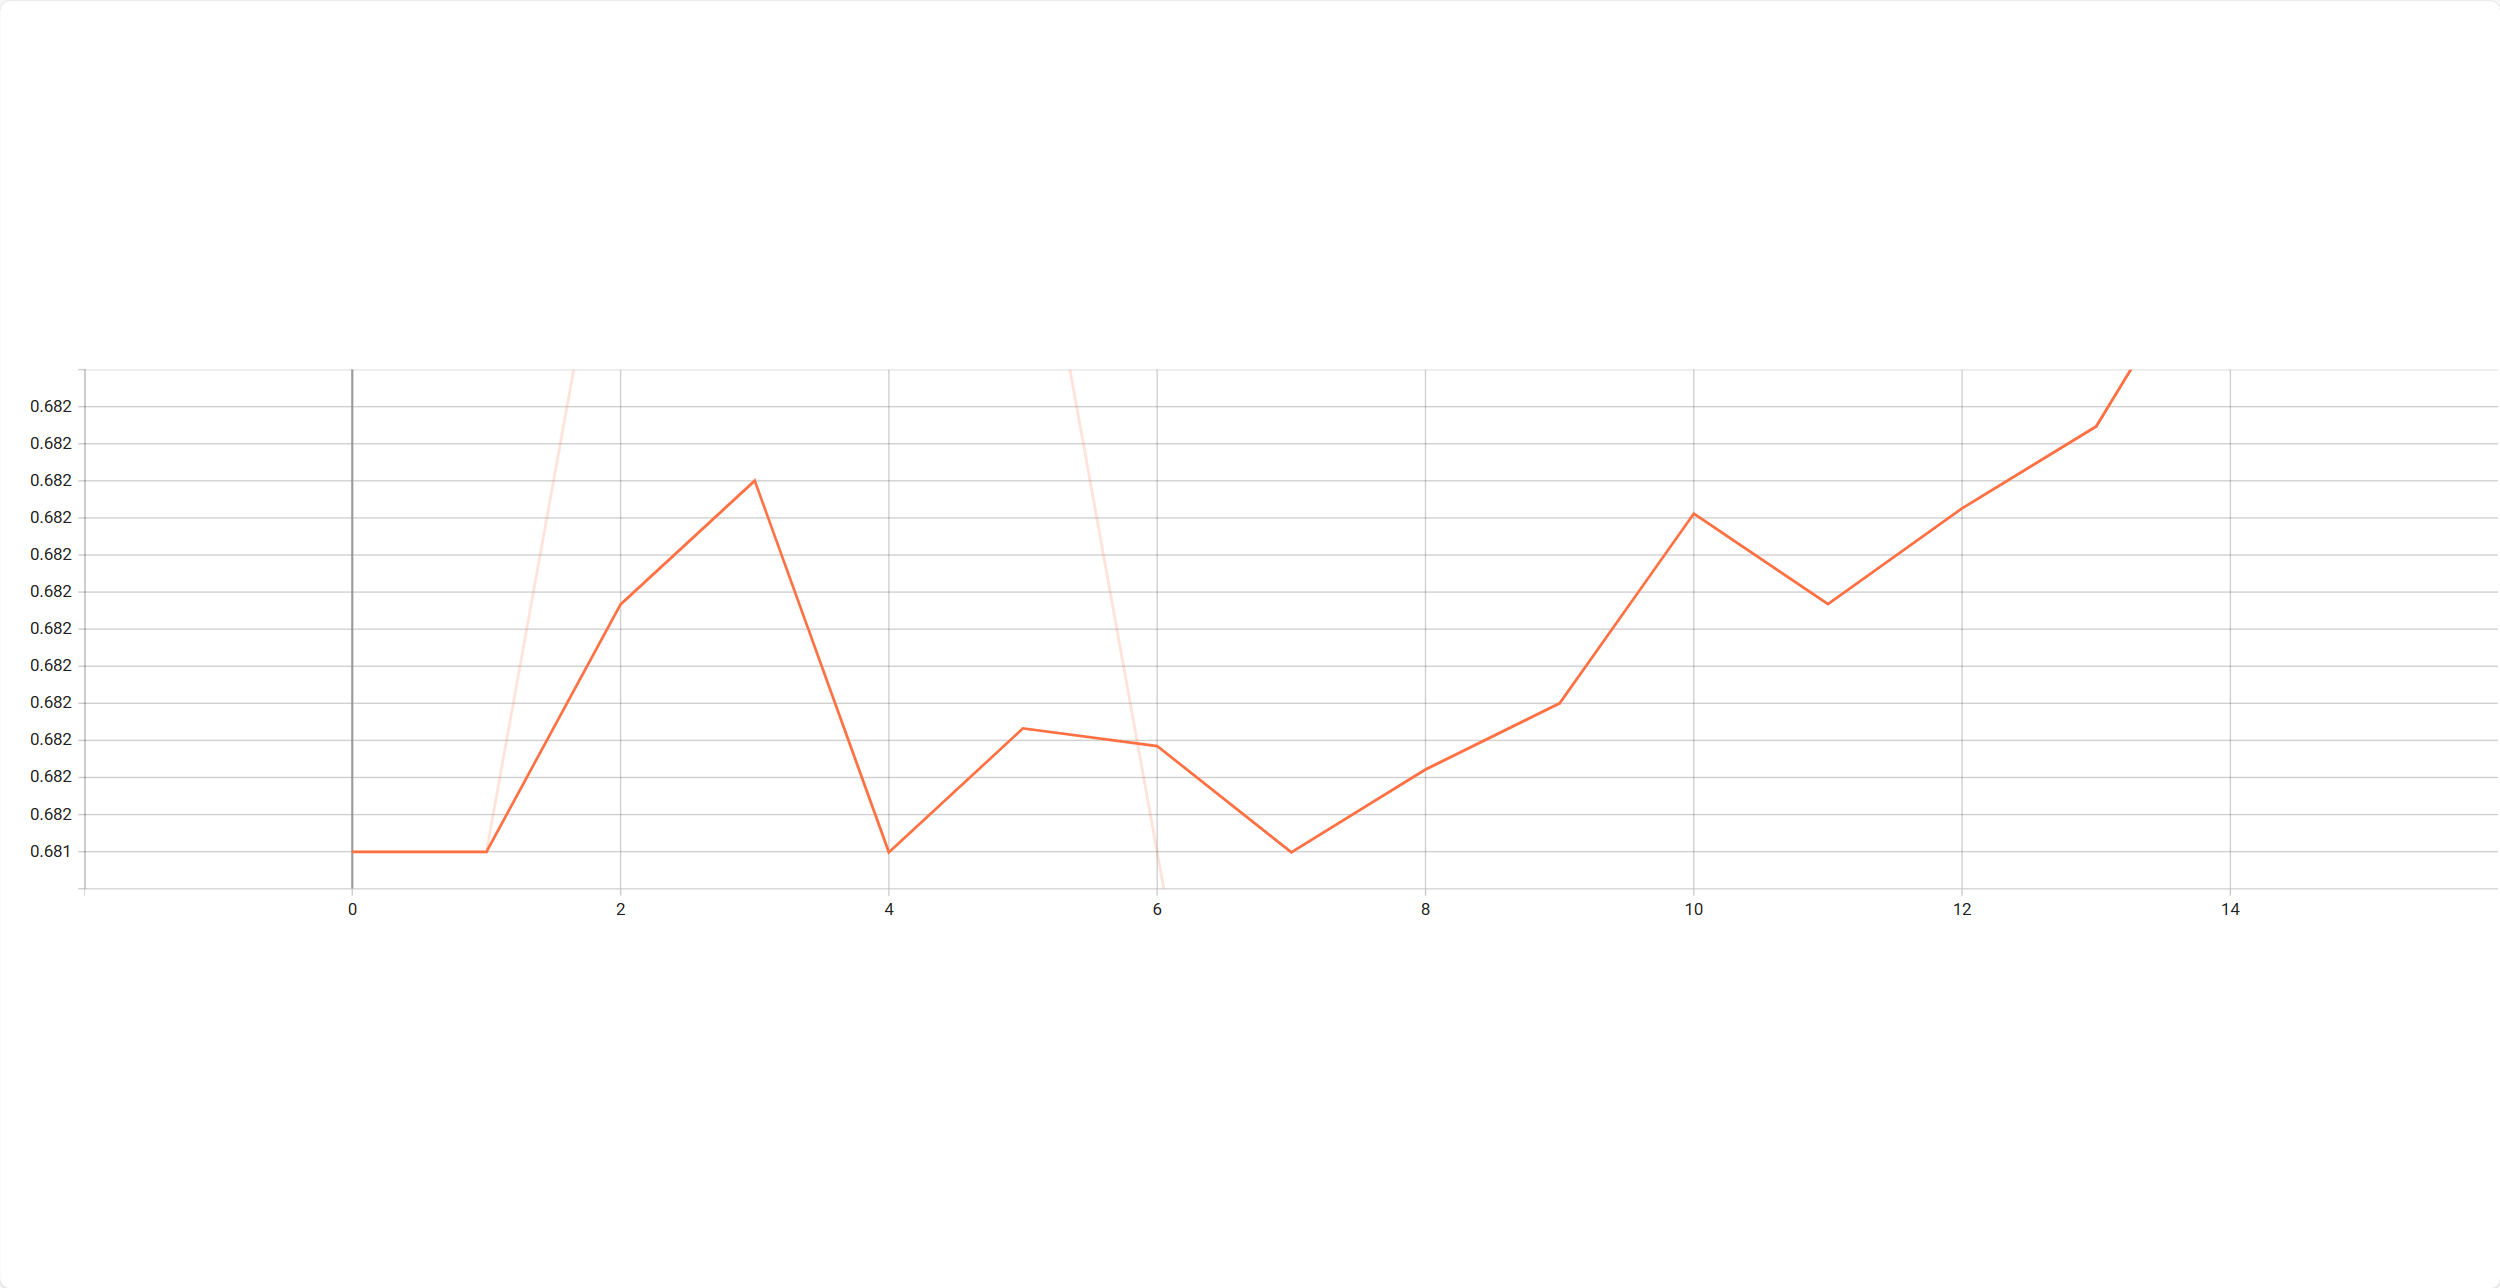

命名变量的时候可以使用形如

In [ ]:
writer.add_scalar('loss/loss1', loss1, epoch)
writer.add_scalar('loss/loss2', loss2, epoch)
writer.add_scalar('loss/loss3', loss3, epoch)

的格式，这样3个loss就会被显示在同一个section。

### 图像可视化
在计算机视觉方向中，经常要处理图像，此时可以使用 tensorboard 展示图像，调用 `add_image()` 或 `add_images()` 函数：

In [ ]:
add_image(tag, img_tensor, global_step=None, walltime=None, dataformats='CHW')

用法几乎与 `add_scalar()` 一致。

### 模型可视化
tensorboard 中的 `add_graph()` 方法可以可视化网络模型结构，以及其输入输出。方法的输入参数为网络模型对象，以及模型的输入数据：

In [ ]:
writer.add_graph(model, inputData)

可视化效果如下所示：
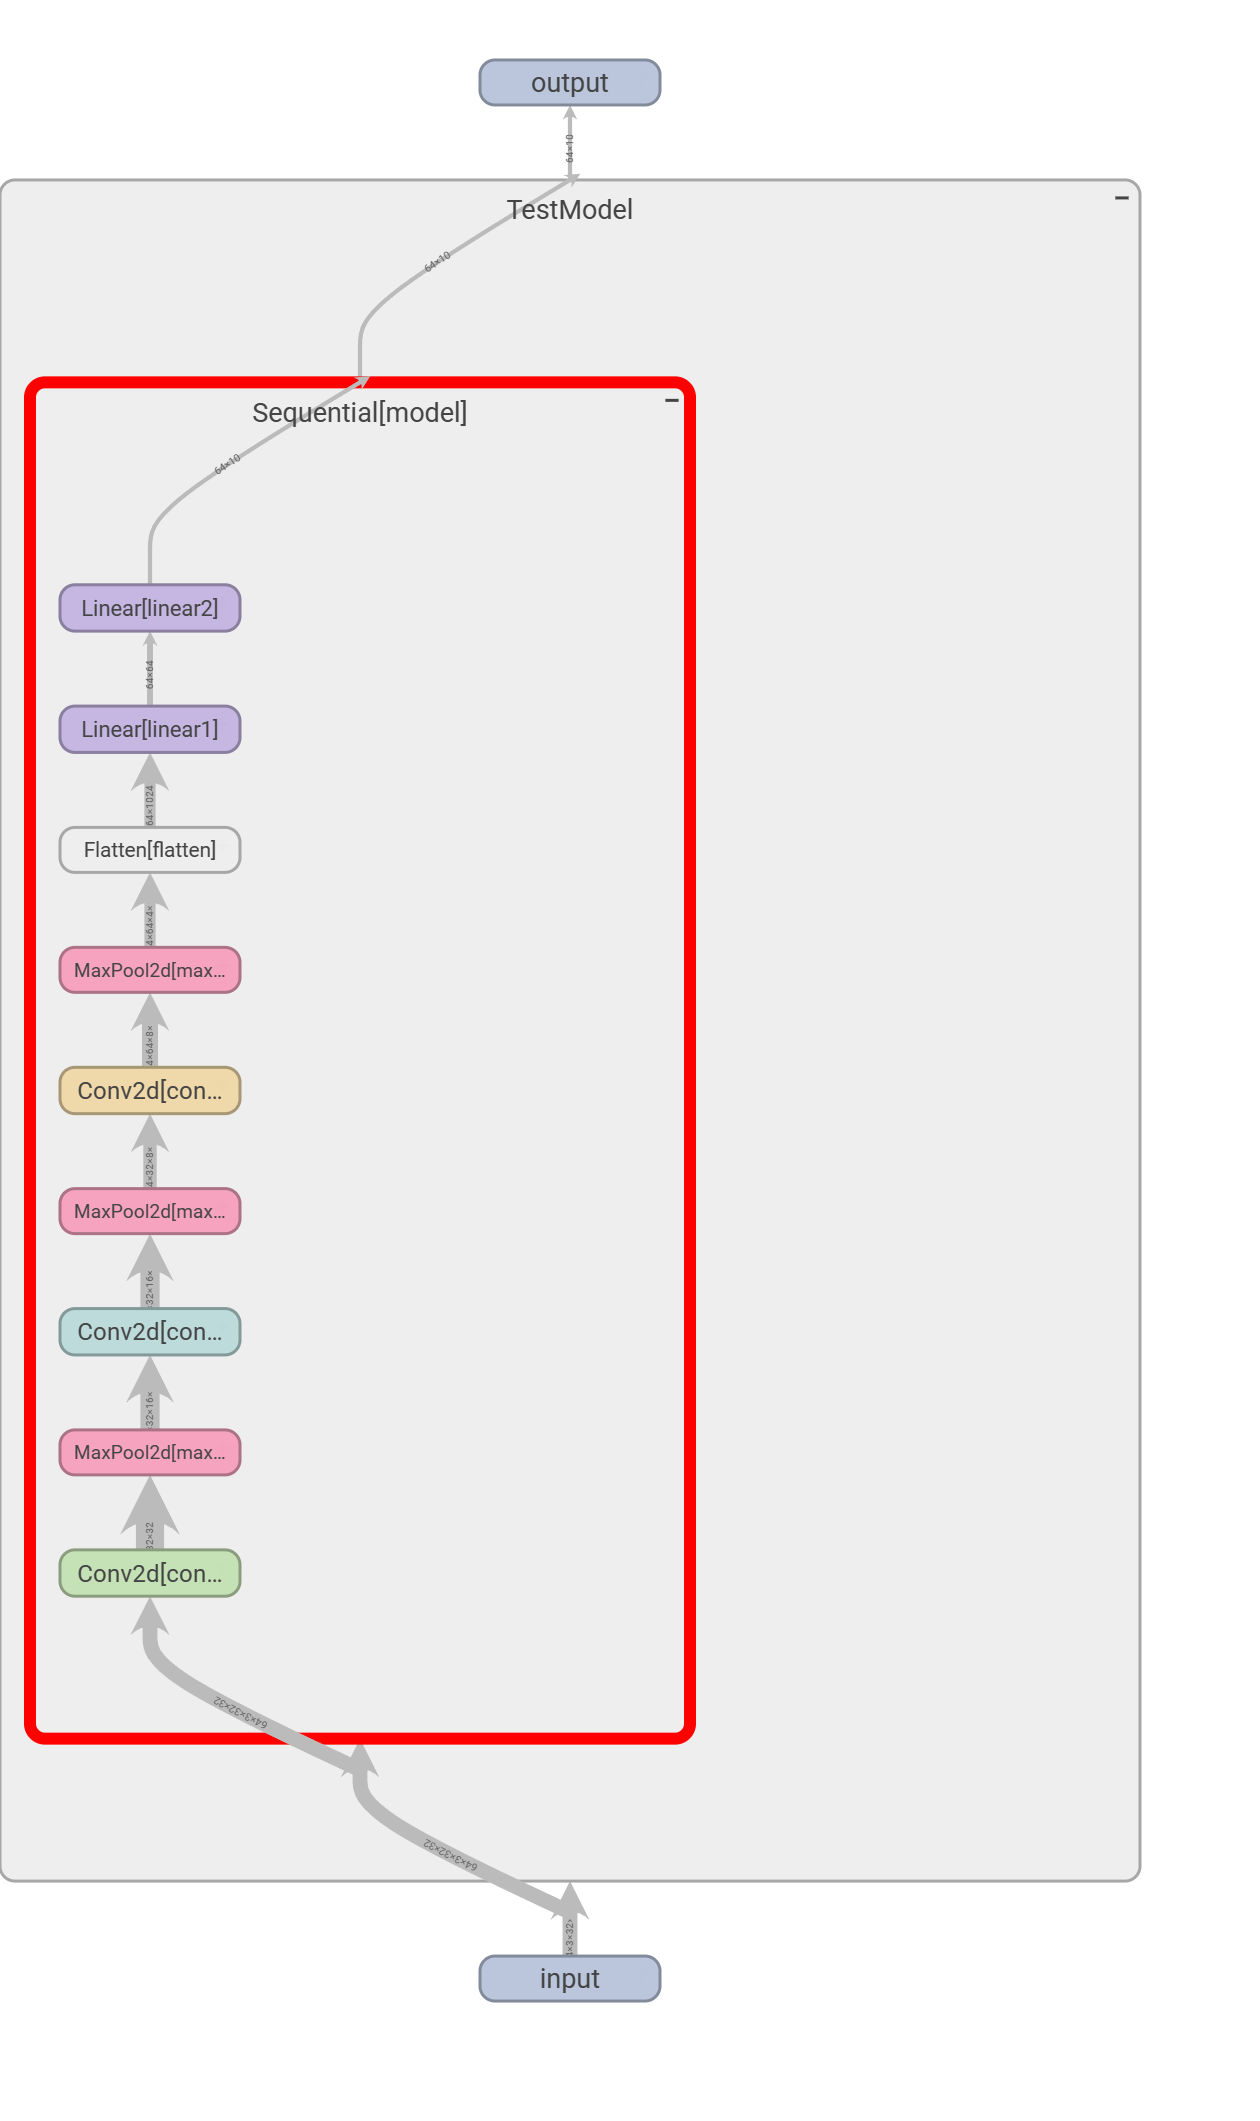